In [1]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

In [2]:
def _length(a):
    return jnp.linalg.norm(a, axis=1)

ORIGIN = jnp.array((0, 0))

SEED = jax.random.PRNGKey(0)


def circle(radius=1, center=(0, 0)):
    center = jnp.array(center)
    def f(p):
        return _length(p - center) - radius

    return f

def translate(sdf, offset):
    offset = jnp.array(offset)
    def f(p):
        return sdf(p - offset)

    return f

In [3]:
def show_sdf(sdf, bounds=(-1, 1), n=500):
    x = jnp.linspace(bounds[0], bounds[1], n)
    X, Y = jnp.meshgrid(x, x)

    grid_points = jnp.column_stack((X.flatten(), Y.flatten()))
    plt.imshow(1-inside(sdf)(grid_points).reshape(n, n), cmap="gray", origin="lower", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])

In [4]:
N = 1000
shape = (N, 2)
dtype = jnp.float32

def naive_area(sdf, bounds=[-1, 1], n=1000):
    points = jax.random.uniform(SEED, (n, 2), jnp.float32, bounds[0], bounds[1])
    computed_sdf = sdf(random_numbers) < 0
    return jnp.sum(computed_sdf) / n * (bounds[1] - bounds[0])**2

In [5]:
def inside(sdf):
   def f(p):
       distance = sdf(p)
       return 1-jax.nn.sigmoid(100* distance)

   return f

In [6]:
def area(sdf, bounds=[-1, 1], n=1000):
    points = jax.random.uniform(SEED, (n, 2), jnp.float32, bounds[0], bounds[1])
    computed_sdf = inside(sdf)(points)
    return jnp.sum(computed_sdf) / n * (bounds[1] - bounds[0])**2
    

In [7]:
area(circle(1), n=10000, bounds=[-1.2, 1.2])

Array(3.1196575, dtype=float32)

In [8]:
jax.value_and_grad(lambda x: area(circle(x), n=1000000, bounds=[-1.2, 1.2]))(jnp.array([1.0]))

(Array(3.144044, dtype=float32), Array([6.2955976], dtype=float32))

In [9]:
def centroid(sdf, bounds=[-1, 1], n=1000):
    points = jax.random.uniform(SEED, (n, 2), jnp.float32, bounds[0], bounds[1])
    inside_points = inside(sdf)(points)
    return jnp.average(points, weights=inside_points, axis=0)

In [10]:
points = jax.random.uniform(SEED, (100000, 2), jnp.float32, -1, 3)
inside_points = inside(translate(circle(), jnp.array([1, 0])))(points)

jnp.average(points, weights=inside_points, axis=0)

Array([0.9911853 , 0.00240598], dtype=float32)

[-0.03357982  1.0125258 ]


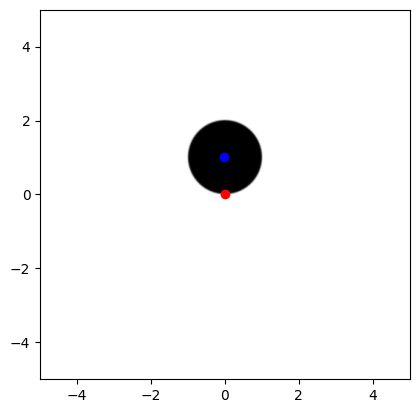

In [11]:
sdf = translate(circle(), (0, 1))
center = centroid(sdf, bounds=(-5, 5), n=10000)
print(center)

show_sdf(sdf, (-5, 5))
plt.scatter(0, 0, c="red")
plt.scatter(center[0], center[1], c="blue")


